#### Université de Bordeaux,  Master Mention Informatique

# Analyse, classification et indexation des données: feuille 5

# Machine Learning

#### k-Nearest Neighbors 



## Exercice 1.  k-Nearest Neighbors (from scratch)

Dans ce premier exercice, nous allons coder un algorithme de classification : le $k$-nn.

On commence par importer les modules python :

- numpy : pour des calculs (algèbre linéaire, etc)
- pandas : pour la lecture des fichiers csv, etc 

In [ ]:
import numpy as np
import pandas as pa

import warnings
warnings.filterwarnings("ignore")

#### Etape 1 : Distance euclidienne

1. Ecrire une fonction pour calculer la distance euclidienne entre deux points (représentés par des np.array). Attention, le tableau donné comme deuxième paramètre de la fonction contient, en dernière position, la classe de l'élément qu'il représente. Cette information n'est pas utilisée pour le calcul de distance.

Tester votre fonction. Les instructions suivantes devront produire le résultat ci-dessous.

In [ ]:
u = np.array([1, 2, 3])
v = np.array([1, 2, 3, 1])
w = np.array([2, 3, 4, 0])
print(euclidean(u, v)) # 0.0
print(euclidean(u, w)) # 1.7320508075688772

2. Ecrire une fonction pour calculer les distances d'un point à tous les autres points d'un dataset (matrice numpy - voir exemple)

Tester votre fonction. Les instructions suivantes devront produire le résultat ci-dessous.

In [ ]:
u = np.array([1, 2, 3])
dataset = np.array([[1, 2, 3, 0],
                    [4, 5, 6, 0],
                    [2, 3, 4, 1],
                    [3, 4, 5, 1]])
dist = distances(u, dataset)
print(dist) # [0.0, 5.196152422706632, 1.7320508075688772, 3.4641016151377544]

#### Etape 2 : Récupérer la liste des $k$ voisins les plus proches

1. Ecrire une fonction <code>voisins</code> permettant de récupérer dans un dataset la liste des $k$-voisins les plus proches d'un point donné.

Tester votre fonction. Les instructions suivantes devront produire le résultat ci-dessous. 

In [ ]:
u = np.array([1, 2, 3])
dataset = np.array([[1, 2, 3, 0],
                    [4, 5, 6, 0],
                    [2, 3, 4, 1],
                    [3, 4, 5, 1]])

print(voisins(u, dataset, 2)) # [array([1, 2, 3, 0]), array([2, 3, 4, 1])]

#### Etape 3 : Faire des prédictions

1. Ecrire une fonction <code>classifier()</code> retournant la classe d'un élément $u$.

Tester votre fonction. Les instructions suivantes devront produire le résultat ci-dessous. 

In [ ]:
u = np.array([4, 5, 6])
dataset = np.array([[1, 2, 3, 0],
                   [2, 3, 4, 1],
                   [3, 4, 5, 0],
                   [4, 5, 6, 1],
                   [1, 2, 3, 0]])

print(classifier(u, dataset, 3)) # 1

### Exercice 2. Application

Dans cet exercice, nous allons appliquer l'algorithme écrit ci-dessus pour classifier des iris.
Pour cela, nous commençons par charger le dataset : 

In [27]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Comme indiqué dans sa description, le dataset contient, pour chaque iris, la longueur et la largeur de sa sépale et la longueur et la largeur de sa pétale. Les iris sont ensuite classifiés soit en Iris-Setosa (0), soit en Iris-Versicolour (1) ou encore en Iris-Virginica (2) :
                

<b>Indication :</b> le dataset <code>iris</code> est composé de deux parties : 
 - <code>iris.data</code> décrit les caractéristiques (features)
 - <code>iris.target</code> contient les classes

In [ ]:
print(iris.target)

In [ ]:
print(iris.data.shape)

In [ ]:
print(iris.target.shape)

Pour des raisons pédagogiques, et pour se focaliser sur l'algorithme, nous avons choisi de l'implémenter pour faire de la classification binaire (c'est ce que réalisent les étapes de l'exercice 1). 

1. Ecrire l'instruction permettant de transformer le problème en un problème de classification binaire :  tous les Iris-Virginica (2) seront classés en Iris-Versicolour (1).

2. Afin d'utiliser l'algorithme que vous avez implémenté dans l'exercice 1, créer un tableau <code>dataset</code> dont le contenu sera des iris avec leur classes. Pour pouvoir visualiser le dataset, nous n'allons garder que les deux premières colonnes.

3. Visualiser le dataset

4. Soit le vecteur $u(6.5, 2.5)$, utilisez votre algorithme avec $k=3$ pour classer $u$.

5. Afficher le nouveau point sur le graphique et vérifier visuellement votre résultat.

### Exercice 3 : $k$-nn avec <code>sklearn</code>

Dans cet exercice, nous allons utiliser le classifieur $k$−nn pour apprendre à reconnaître des fruits. Pour cela, nous allons utiliser le dataset fruits disponible au format csv à l’adresse :
               
               https://www.labri.fr/~zemmari/datasets/fruits.csv

1. Charger les données, puis afficher les informations pour vérifier si le dataset ne contient pas de données manquantes.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.read_csv("https://www.labri.fr/~zemmari/datasets/fruits.csv", delimiter='\t')
df

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


2. Afficher un graphique pour visualiser les tailles (height) en fonction des largeurs (width), sans tenir compte des classes des points dans un premier temps.

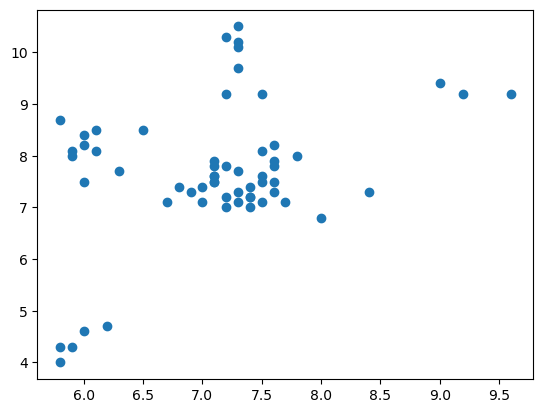

In [13]:
plt.scatter(df["width"], df["height"])

3. Modifier votre graphique pour qu’il affiche les points avec des couleurs différentes en fonction du
nom (<code>fruit_name</code>) du fruit. Vérifier que les classes sont assez équilibrées.

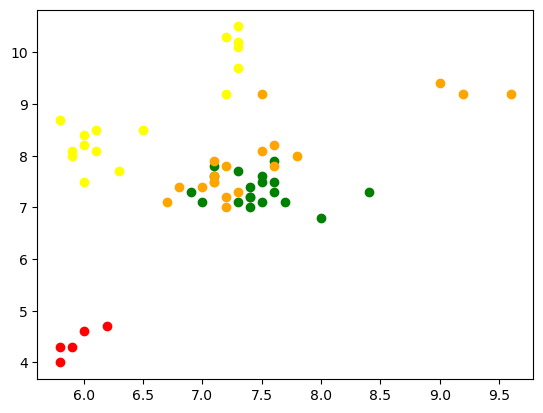

In [19]:
couleurs = {'lemon': 'yellow', 'apple' : 'green', 'orange': 'orange', 'mandarin': 'red'}
fruit = df['fruit_name']
width = df["width"]
height = df["height"]
for f in couleurs.keys():
    plt.scatter(width[fruit == f], height[fruit == f], c = couleurs[f], marker = 'o', label = f)


4. Définir X les données composées de la taille, la longueur et la masse des fruits, et Y les noms des
fruits.

In [24]:
X = df[['height', 'width', 'mass']]
Y = df['fruit_name']
X
Y

0        apple
1        apple
2        apple
3     mandarin
4     mandarin
5     mandarin
6     mandarin
7     mandarin
8        apple
9        apple
10       apple
11       apple
12       apple
13       apple
14       apple
15       apple
16       apple
17       apple
18       apple
19       apple
20       apple
21       apple
22       apple
23       apple
24      orange
25      orange
26      orange
27      orange
28      orange
29      orange
30      orange
31      orange
32      orange
33      orange
34      orange
35      orange
36      orange
37      orange
38      orange
39      orange
40      orange
41      orange
42      orange
43       lemon
44       lemon
45       lemon
46       lemon
47       lemon
48       lemon
49       lemon
50       lemon
51       lemon
52       lemon
53       lemon
54       lemon
55       lemon
56       lemon
57       lemon
58       lemon
Name: fruit_name, dtype: object

5. Découper les données en deux parties : une pour l’entraînement et une pour le test.

In [34]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=.3, random_state=1)

6. Entraîner un classifieur $k$−nn à reconnaître les fruits. 

In [35]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

#on crée un classifieur knn
knn = KNeighborsClassifier(n_neighbors=3)

#On entraine ce classifieur
knn.fit(xtrain, ytrain)

#on prédit les etiquettes des x
y_pred = knn.predict(xtest)

#on vérifie le pourcentage de justesse des etiquettes
rslt = accuracy_score(ytest, y_pred)

print("Score = ", rslt)


Score =  0.6666666666666666


7. Quelle est la valeur par défaut de $k$ ?

In [ ]:
#JSP MON REUF C'EST QUOI CETTE QUESTION ?

8. Utiliser votre jeu de test pour mesurer les performances de votre classifieur (matrice de confusion, accuracy, ...). 

In [ ]:
rslt = accuracy_score(ytest, y_pred)

print("Score = ", rslt)

In [36]:
from sklearn.metrics import confusion_matrix

# Y_true contient les étiquettes réelles, Y_pred contient les prédictions du modèle
confusion = confusion_matrix(ytest, y_pred)
print(f"la confusion est {confusion}")


la confusion est [[4 0 0 0]
 [3 2 0 0]
 [0 0 1 0]
 [3 0 0 5]]


7. Quelle est la nature du fruit dont la masse, la largeur et la taille sont données respectivement par 100, 6.3 et 8? 

In [41]:
fruit_recherche = df[(df['mass'] == 100) & (df['width'] == 6.3) & (df['height'] == 8)]
fruit_recherche
Ystest = [100, 6.3, 8]
ypred = knn.predict(Ystest)
print(ypred)

/usr/lib/python3/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[100.    6.3   8. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

8. Trouver une "bonne" valeur pour k.